# Classification with TensorFlow Neural Networks

In [76]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools, random, math

from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

## Binary Classification

In [2]:
n_samples = 1000

x, y = make_circles(n_samples,
                    noise=0.05,
                    random_state=42)
x[:10]

array([[ 0.74220688,  0.24668576],
       [-0.7340323 ,  0.16869164],
       [-0.82985872,  0.22195899],
       [-0.42913559,  0.67223019],
       [ 0.44560223, -0.89493556],
       [-0.46988549,  0.70803745],
       [-0.01604538,  0.80562331],
       [ 0.75962295,  0.15952616],
       [-0.17569191, -0.79983689],
       [-0.11061613,  1.04220747]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

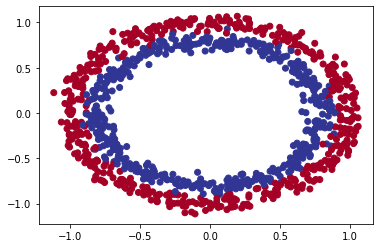

In [4]:
circles = pd.DataFrame({'x0' : x[:, 0], 
                        'x1' : x[:, 1],
                        'y' : y})

plt.scatter(x[:, 0], x[:, 1], 
            c=y, # Split colors based on x0 and x1 
            cmap=plt.cm.RdYlBu)

In [5]:
circles.head()

,x0,x1,y
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=64)

Text(0, 0.5, 'loss')

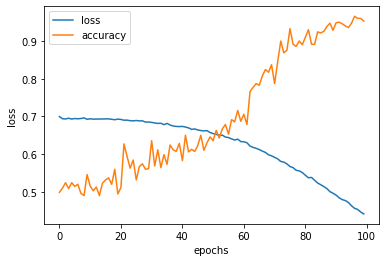

In [7]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(40, activation=tf.keras.activations.tanh))
model_1.add(tf.keras.layers.Dense(40, activation=tf.keras.activations.tanh))
model_1.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid))

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_1.fit(x_train, y_train, epochs=100, verbose=0)

pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

In [8]:
model_1.evaluate(x_test, y_test)

10/10 [==============================] - 0s 542us/step - loss: 0.4465 - accuracy: 0.9500


[0.4464944005012512, 0.949999988079071]

In [9]:
def plot_decision_boundary(model, x, y):
    
    x_min, x_max = x[:, 0].min() - 0.2, x[:, 0].max() + 0.2
    y_min, y_max = x[:, 1].min() - 0.2, x[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create x-value (making predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Makin predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print('Multi-class Classification')
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('Binary Classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

https://github.com/GokuMohandas/Made-With-ML

Binary Classification
Binary Classification


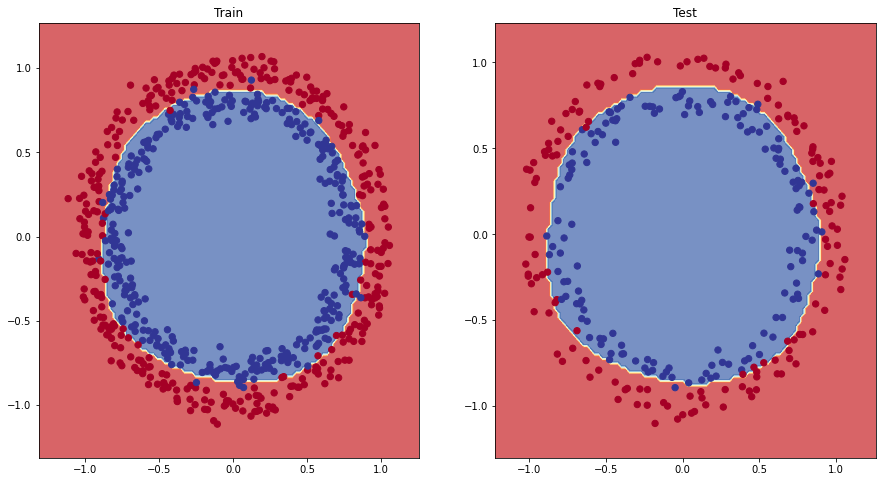

In [10]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_1, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_1, x_test, y_test)
plt.show()

## Activation Functions

There are multiple different activation functions to fit to a model:

* Linear
* ReLu (Rectified Linear Unit)
* Tanh (Hyperbolic Tangent Function)
* Sigmoid
* Softmax
etc...

Sigmoid and Softmax are usually applied to output layers to make them better classifiers (Sigmoid for binary and Softmax for multi-class)

In [11]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [12]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [13]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

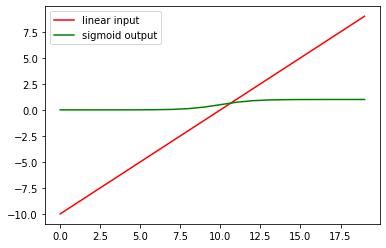

In [14]:
plt.plot(A, c='red', label='linear input')
plt.plot(sigmoid(A), c='g', label='sigmoid output')
plt.legend()

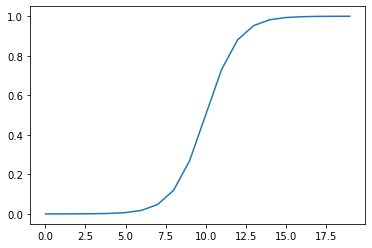

In [15]:
plt.plot(sigmoid(A))

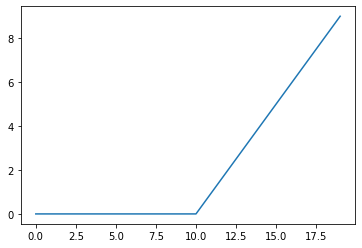

In [16]:
def relu(x):
    return tf.maximum(x, 0)

plt.plot(relu(A))

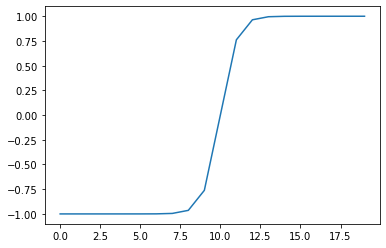

In [17]:
def tanh(x):
    return (tf.exp(x) - tf.exp(-x)) / (tf.exp(x) + tf.exp(-x))

plt.plot(tanh(A))

In [18]:
# Linear activation returns the activation function unmodified
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

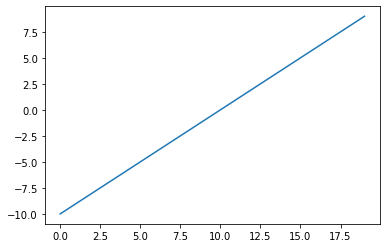

In [19]:
plt.plot(tf.keras.activations.linear(A))

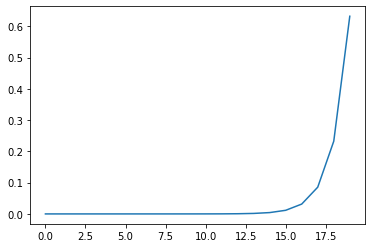

In [20]:
def softmax(x):
    return tf.exp(x) / tf.reduce_sum(tf.exp(x))

plt.plot(softmax(A))

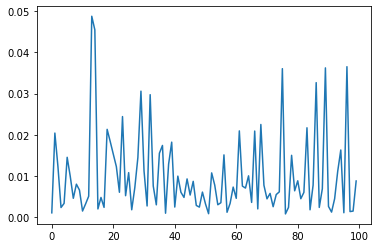

In [21]:
tf.random.set_seed(48)

B = tf.random.normal([100], seed=48)

plt.plot(softmax(B))

## Learning Rate Callback

The ideal learning rate shouldn't be constant really. It should be large when the loss curve is (close to) horizontal, and small when the loss curve is (close to) vertical.
There are multiple ways of applying callbacks:

* LR Scheduling - 

In [25]:
tf.random.set_seed(42)

## Building the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fitting the model and scheduling the epoch.
history_2 = model_2.fit(x_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100


22/22 [==============================] - 0s 568us/step - loss: 0.6892 - accuracy: 0.4986 - lr: 1.0000e-04
Epoch 2/100
22/22 [==============================] - 0s 668us/step - loss: 0.6889 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
22/22 [==============================] - 0s 650us/step - loss: 0.6886 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
22/22 [==============================] - 0s 665us/step - loss: 0.6885 - accuracy: 0.5029 - lr: 1.4125e-04
Epoch 5/100
22/22 [==============================] - 0s 631us/step - loss: 0.6879 - accuracy: 0.5100 - lr: 1.5849e-04
Epoch 6/100
22/22 [==============================] - 0s 587us/step - loss: 0.6876 - accuracy: 0.5071 - lr: 1.7783e-04
Epoch 7/100
22/22 [==============================] - 0s 760us/step - loss: 0.6871 - accuracy: 0.5100 - lr: 1.9953e-04
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5114 - lr: 2.2387e-04
Epoch 9/100
22/22 [==============================] - 0s 742us/step - l

<AxesSubplot:xlabel='epochs'>

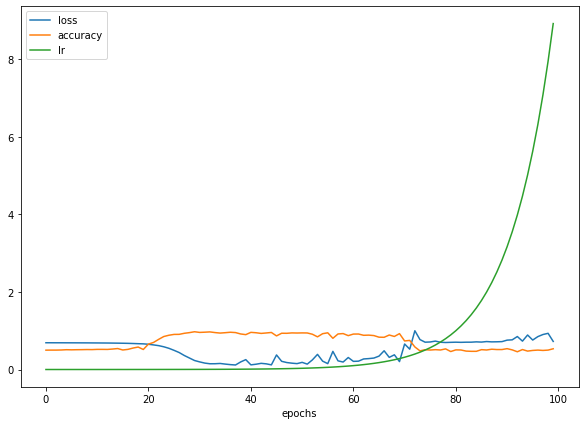

In [26]:
pd.DataFrame(history_2.history).plot(figsize=(10, 7), xlabel='epochs')

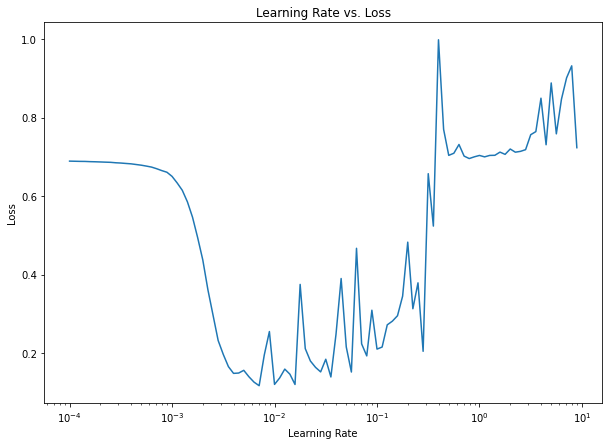

In [27]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs. Loss')
plt.show()

The optimal learning rate should be the learning rate where the loss decreases the most, so with this learning rate the loss is at the lowest at about $10^{-2}$, but the loss decreases the most at approx $10^{-2.5}$

In [28]:
10**-2.5

0.0031622776601683794

Using the ideal learning rate with the same model

In [29]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with the ideal learning rate
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=['accuracy'])

# Train the model
history_3 = model_3.fit(x_train,
                        y_train,
                        epochs=100)

Epoch 1/100
22/22 [==============================] - 0s 852us/step - loss: 0.6894 - accuracy: 0.5157
Epoch 2/100
22/22 [==============================] - 0s 838us/step - loss: 0.6810 - accuracy: 0.5386
Epoch 3/100
22/22 [==============================] - 0s 810us/step - loss: 0.6695 - accuracy: 0.5386
Epoch 4/100
22/22 [==============================] - 0s 770us/step - loss: 0.6510 - accuracy: 0.5500
Epoch 5/100
22/22 [==============================] - 0s 849us/step - loss: 0.6291 - accuracy: 0.6643
Epoch 6/100
22/22 [==============================] - 0s 853us/step - loss: 0.5841 - accuracy: 0.7971
Epoch 7/100
22/22 [==============================] - 0s 659us/step - loss: 0.5269 - accuracy: 0.8486
Epoch 8/100
22/22 [==============================] - 0s 740us/step - loss: 0.4662 - accuracy: 0.9000
Epoch 9/100
22/22 [==============================] - 0s 791us/step - loss: 0.4100 - accuracy: 0.9014
Epoch 10/100
22/22 [==============================] - 0s 749us/step - loss: 0.3339 - accura

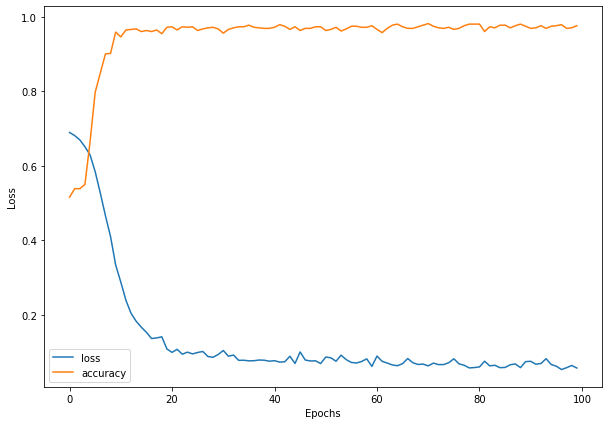

In [33]:
pd.DataFrame(history_3.history).plot(figsize=(10, 7))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [31]:
model_3.evaluate(x_test, y_test)

10/10 [==============================] - 0s 575us/step - loss: 0.0915 - accuracy: 0.9667


[0.09146807342767715, 0.9666666388511658]

In [32]:
model_1.evaluate(x_test, y_test)

10/10 [==============================] - 0s 696us/step - loss: 0.4465 - accuracy: 0.9500


[0.4464944005012512, 0.949999988079071]

Here we can see that the latest model performs slightly better than the first model

Binary Classification
Binary Classification


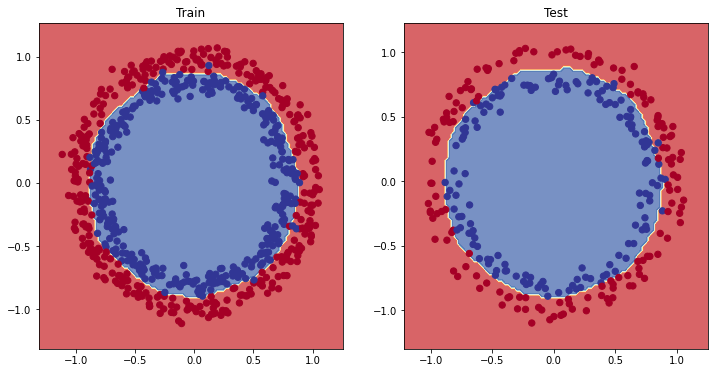

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_3, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_3, x_test, y_test)
plt.show()

## Evaluation Methods for Classification

* Accuracy - $ {TP + TN \over TP + FP + FP + FN} $

* Recall - $ {TP \over TP + FN} $

* Precision - $ {TP \over TP + FP} $

* F1-Score - $ 2 * {Precision * Recall \over Precision + Recall} $

In [40]:
y_pred = model_3.predict(x_test)
y_pred[:10]

array([[9.9978757e-01],
       [9.9940455e-01],
       [5.1700390e-06],
       [5.8430640e-05],
       [8.5224795e-01],
       [2.1250856e-01],
       [1.2403727e-04],
       [9.9824762e-01],
       [2.5976598e-03],
       [9.9972665e-01]], dtype=float32)

In [41]:
y_pred = tf.round(y_pred)

In [43]:
# Confusion  Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[148,   2],
       [  8, 142]], dtype=int64)

In [47]:
def plot_confusion_matrix(cm):
    figsize = (10, 10)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalizing the confusion matrix
    n_classes = cm.shape[0]

    # Prettifying the Confusion Matrix
    fig, ax = plt.subplots(figsize=figsize)

    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Create classes
    classes = False

    if classes:
        labels = classes
    else:
        labels = np.arange(n_classes)

    # Label the axes
    ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        yticks=np.arange(n_classes),
        xticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f" {cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                horizontalalignment='center',
                color='white' if cm[i, j] > threshold else 'black',
                size=15)

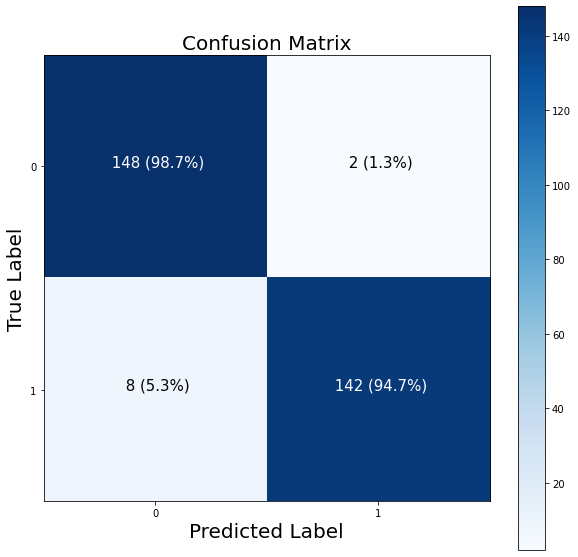

In [48]:
plot_confusion_matrix(cm)

## Multi-Class Classification

In [58]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [59]:
print(f" Training sample: \n {x_train[0]} ")

 Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   

In [60]:
print(f"Training Labels: \n {y_train[0]} ")

Training Labels: 
 9 


| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

In [61]:
x_train[0].shape, y_train[0].shape

((28, 28), ())

 Training Label: 9


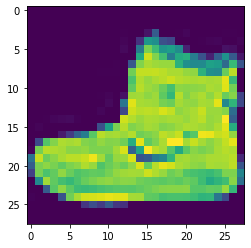

In [62]:
print(f" Training Label: {y_train[0]}")
plt.imshow(x_train[0])

 Training Label: 0


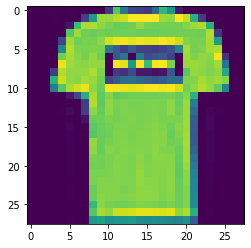

In [63]:
print(f" Training Label: {y_train[1]}")
plt.imshow(x_train[1])

In [72]:
# Create a small dictionary of legible labels
class_index_dict = {'T-shirt/top' : 0,
                    'Trouser' : 1,
                    'Pullover' : 2,
                    'Dress' : 3,
                    'Coat' : 4,
                    'Sandal' : 5,
                    'Shirt' : 6,
                    'Sneaker' : 7,
                    'Bag' : 8,
                    'Ankle Boot' : 9}

# Creating a mapping function for the dictionary
mapping = np.vectorize(lambda x: list(class_index_dict.keys())[list(class_index_dict.values()).index(x)])

# Mapping the labels of the training set
y_train_labels = mapping(y_train)

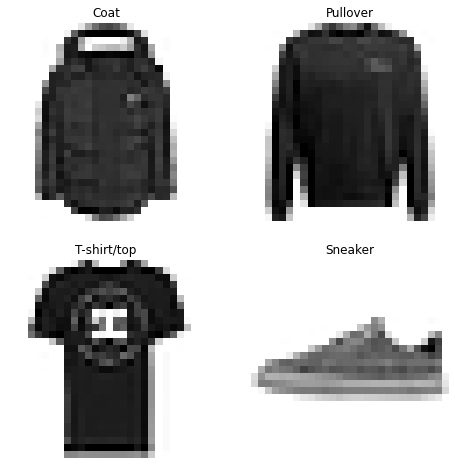

In [83]:
# Plotting 4 random images of the MNIST Fashion dataset
plt.figure(figsize=(8, 8))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(y_train_labels)))
    plt.imshow(x_train[rand_index], cmap=plt.cm.binary)
    plt.title(y_train_labels[rand_index])
    plt.axis(False)

Because we are working with images we will need to flatten the dataset on the input layer

In [150]:
input_shape = x_train[0].shape
output_shape = len(np.unique(y_train))

print(f"""
Input Shape: {input_shape}\n
Output Shape: {output_shape}
""")


      Input Shape: (28, 28)

      Output Shape: 10


<AxesSubplot:>

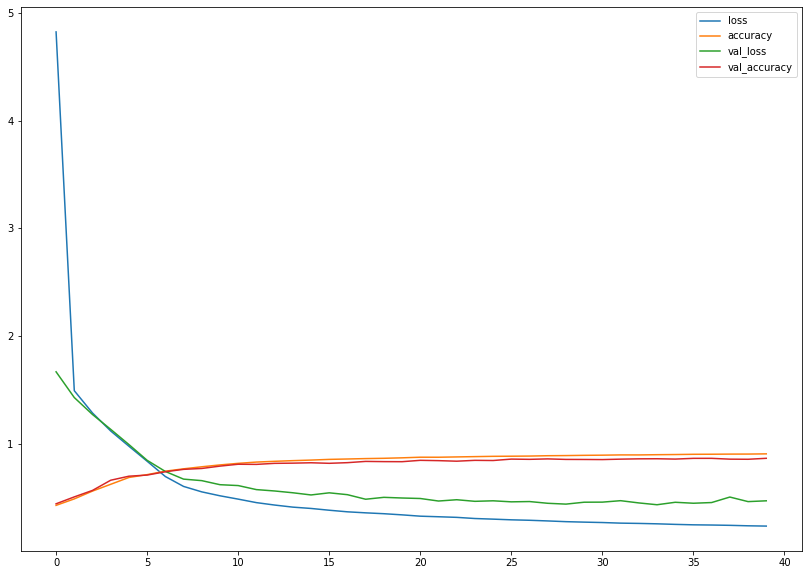

In [129]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape), # This flattens the dataset from (28, 28) to (None, 784) <---> 784 == (28 * 28)
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])


# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-10 * 10**(epoch/20))

history_4 = model_4.fit(x_train, 
                        y_train, 
                        epochs=40,
                        # callbacks=[lr_scheduler],
                        validation_data=(x_test, y_test),
                        verbose=0)

pd.DataFrame(history_4.history).plot(figsize=(14, 10))

In [131]:
model_4.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.8697


[0.4757128357887268, 0.869700014591217]

## Normalizing the model

In [136]:
x_train_norm = x_train / x_train.max()
x_test_norm = x_test / x_test.max()

In [159]:
# Setting the input-, and output shapes of the model
input_shape = x_train[0].shape
output_shape = len(np.unique(y_train))

print(f"""
Input Shape: {input_shape}\n
Output Shape: {output_shape}
""")


Input Shape: (28, 28)

Output Shape: 10



<AxesSubplot:>

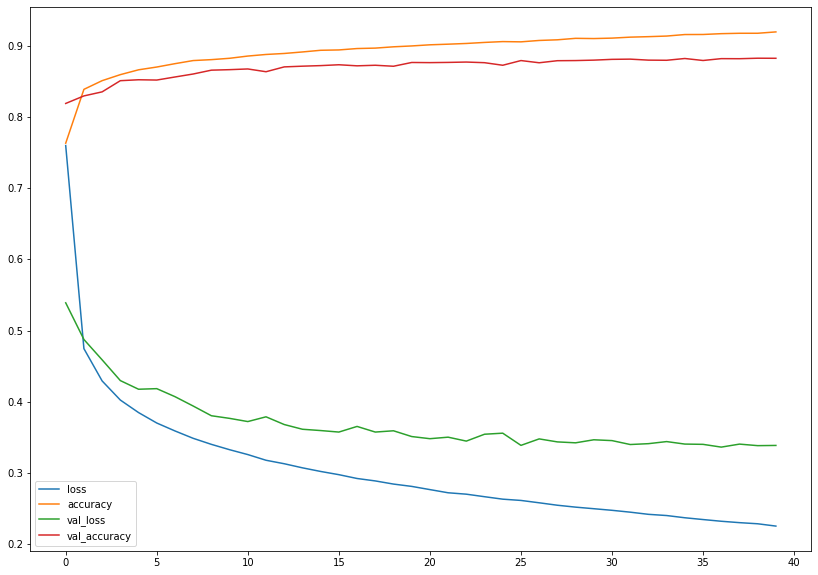

In [167]:
# Setting the random seed
tf.random.set_seed(42)

# Creating the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(output_shape, activation=tf.keras.activations.softmax)
])

model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

history_5 = model_5.fit(x_train_norm,
                        y_train,
                        epochs=40,
                        validation_data=(x_test_norm, y_test),
                        verbose=0)

pd.DataFrame(history_5.history).plot(figsize=(14, 10))

In [168]:
model_5.evaluate(x_test_norm, y_test)

  1/313 [..............................] - ETA: 4s - loss: 0.3691 - accuracy: 0.9062

313/313 [==============================] - 0s 713us/step - loss: 0.3385 - accuracy: 0.8828


[0.3384876847267151, 0.8827999830245972]

<AxesSubplot:title={'center':'Normalized data'}>

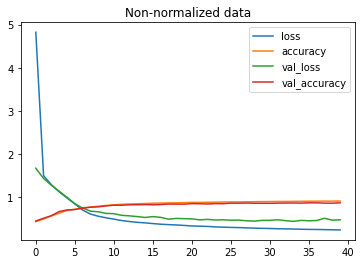

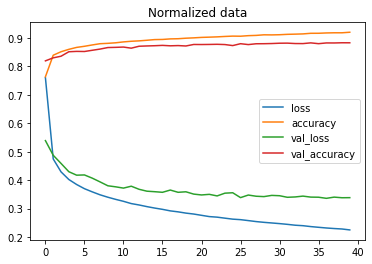

In [169]:
pd.DataFrame(history_4.history).plot(title='Non-normalized data')
pd.DataFrame(history_5.history).plot(title='Normalized data')

Machine learning models prefer data that is normalized (between 0 and 1)

<AxesSubplot:>

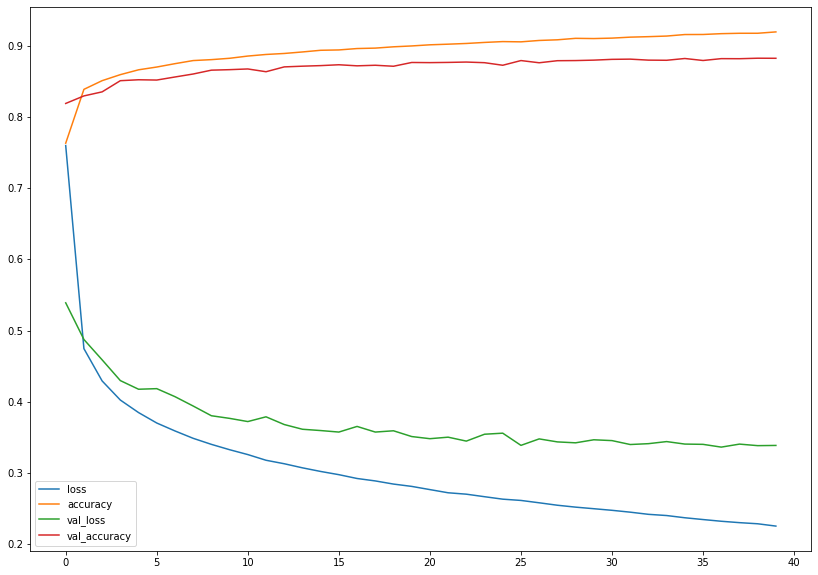

In [170]:
# Setting the random seed
tf.random.set_seed(42)

# Creating the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(output_shape, activation='softmax')
])

model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

history_6 = model_6.fit(x_train_norm,
                        y_train,
                        epochs=40,
                        validation_data=(x_test_norm, y_test),
                        verbose=0)

pd.DataFrame(history_6.history).plot(figsize=(14, 10))

In [171]:
model_6.evaluate(x_test_norm, y_test)

313/313 [==============================] - 0s 578us/step - loss: 0.3385 - accuracy: 0.8828


[0.3384876847267151, 0.8827999830245972]

In [196]:
y_pred = model_6.predict(x_test_norm).argmax(axis=1)

In [198]:
y_pred[0], list(class_index_dict.keys())[y_pred[0]]

(9, 'Ankle Boot')

In [199]:
confusion_matrix(y_test, y_pred)

array([[857,   4,  18,  22,   5,   2,  82,   0,  10,   0],
       [  3, 971,   0,  20,   3,   0,   3,   0,   0,   0],
       [ 25,   0, 805,   8, 104,   0,  57,   0,   1,   0],
       [ 24,   9,  14, 869,  49,   0,  29,   0,   6,   0],
       [  0,   1,  73,  20, 860,   0,  44,   0,   2,   0],
       [  0,   0,   0,   1,   0, 951,   0,  31,   2,  15],
       [154,   2,  91,  21,  78,   0, 642,   0,  12,   0],
       [  0,   0,   0,   0,   0,  12,   0, 974,   0,  14],
       [  6,   1,   5,   3,   5,   3,   4,   4, 969,   0],
       [  0,   0,   0,   0,   0,   9,   1,  60,   0, 930]], dtype=int64)

## Evaluating Multi-Class Classification Models

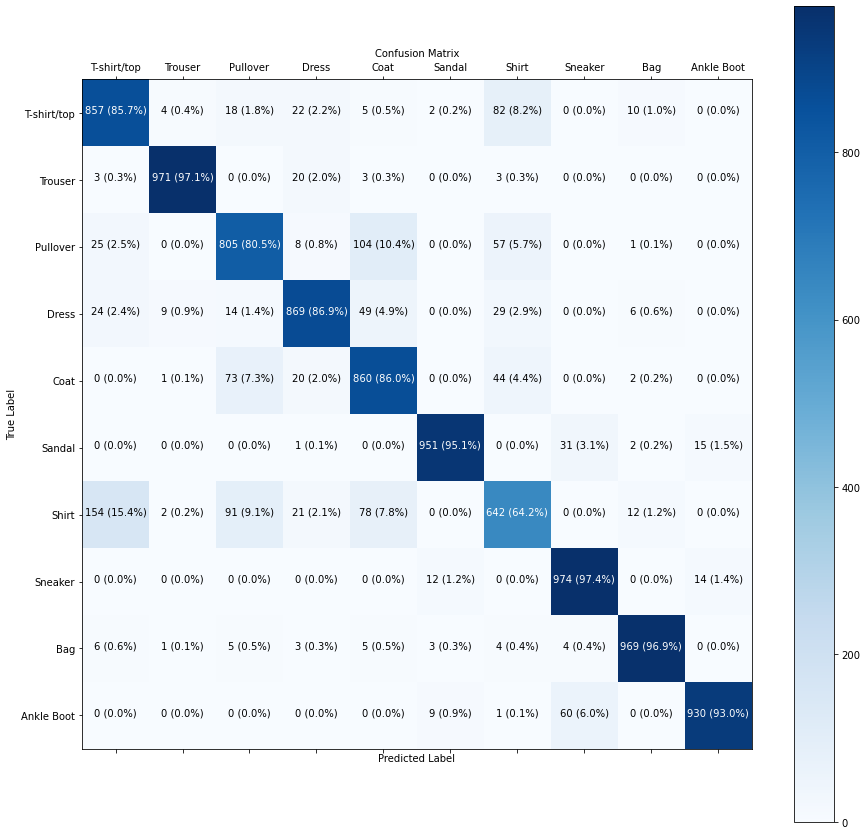

In [208]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalizing the confusion matrix
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    
    ax.set(title='Confusion Matrix',
           xlabel='Predicted Label',
           ylabel='True Label',
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=text_size)

class_labels = list(class_index_dict.keys())

make_confusion_matrix(y_test, y_pred, classes=class_labels, figsize=(15, 15), text_size=10)

We see that most predictions were correct. There are certain errors that was made (e.g. predicted T-shirts when True was Shirt (15.4%)) but overall, the model is pretty accurate

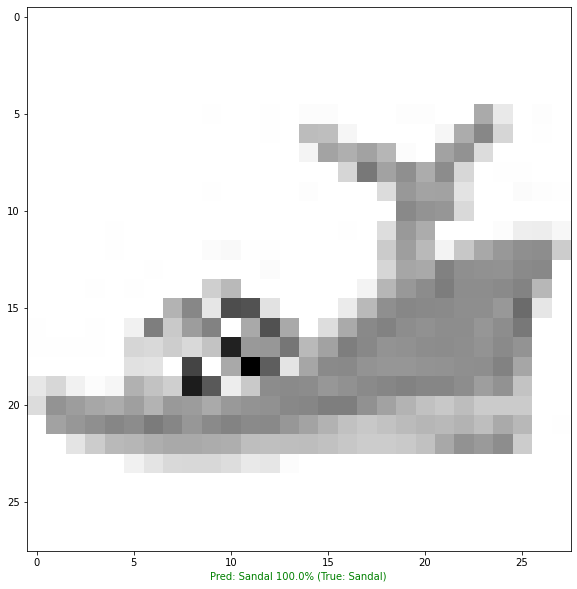

In [227]:
def plot_random_image(model, images, true_labels, classes, figsize=(10, 10)):
    """
    Picks a random image, plots it and labels it with predicted and True label
    """

    # Set up random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    prediction = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[int(prediction.argmax(axis=1))]
    true_label = classes[true_labels[i]]

    plt.figure(figsize=figsize)
    plt.imshow(target_image, cmap=plt.cm.binary)

    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel(f"Pred: {pred_label} {tf.round(tf.reduce_max(prediction) * 100)}% (True: {true_label})", color=color)

plot_random_image(model=model_6, 
                  images=x_test_norm, 
                  true_labels=y_test, 
                  classes=class_labels)

## Get the patterns of the model

In [229]:
# Finding the layers of the most recent model
model_6.layers

In [233]:
# Get the patterns of a layer in the model
weights, biases = model_6.layers[1].get_weights() # Layer 1 is the input layer (Layer 0 only flattens the model and don't contain weights)
print(weights.shape)
weights

(784, 100)


array([[-0.1321244 , -0.0181891 , -0.16683319, ..., -0.14413805,
        -0.26626953, -0.0017956 ],
       [-0.02436274, -0.06608519, -0.12350023, ...,  0.09176382,
         0.12268666, -0.11570724],
       [ 0.20094635, -0.04681571, -0.13765153, ...,  0.1179908 ,
         0.02610306, -0.13668142],
       ...,
       [ 0.10341452,  0.08606721,  0.05421349, ...,  0.29661298,
        -0.00916139,  0.07817999],
       [-0.10086618,  0.02579064, -0.11356474, ...,  0.04945226,
        -0.11165451, -0.00522911],
       [ 0.04599119,  0.04162004, -0.1052394 , ...,  0.13918889,
        -0.13133247,  0.03935916]], dtype=float32)

In [234]:
print(biases.shape)
biases

(100,)


array([-0.05036513,  0.20801541,  0.08290737, -0.01972826,  0.07181033,
        0.11807805,  0.04117305,  0.13565227,  0.26332784, -0.13777886,
       -0.14589047,  0.09786568,  0.22236894,  0.12552924, -0.07072773,
       -0.01717164, -0.11729231, -0.11635616,  0.1071709 ,  0.15532182,
       -0.00243241, -0.03851293,  0.20501639,  0.07334679, -0.04680764,
       -0.04639266,  0.11211444,  0.0200964 ,  0.02227603,  0.13070212,
        0.14282617,  0.01633292, -0.03709265,  0.08337788,  0.01493069,
        0.15425943,  0.19718637,  0.14665468,  0.02901234, -0.15700525,
        0.14013891,  0.2628991 ,  0.02374068, -0.04034478, -0.0146781 ,
       -0.25661463,  0.06861252, -0.05541209,  0.05891031, -0.17147219,
        0.13180356,  0.18038686,  0.04712744,  0.26319993,  0.01852557,
       -0.06204154,  0.04516013,  0.03278726,  0.17662323,  0.22423308,
       -0.06067105,  0.10592812,  0.05500223, -0.03948271, -0.03716486,
        0.20715155,  0.07610101,  0.15051143, -0.02277198, -0.00

The shape of the weights matrix is (784, 100). 

* 784 = 28 * 28, which was the shape of the dataset when we flattened it.

* 100 is because we set the input-layer to have 100 neurons

Every neuron has a bias (100 neurons means a vector of 100 biases). The bias vector determines how much each corresponding neuron within the layer should influence the next layer